In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
data = pd.read_csv(r'C:\Users\vashi\Downloads\new_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,68,CASH_OUT,406229.24,C6140660731,1810730.08,1404500.84,C5635849557,268905.29,675134.53,0
1,159,PAYMENT,275190.13,C7046563598,591089.00,315898.87,M5746858661,0.00,0.00,0
2,17,CASH_IN,480273.31,C3203400778,4342340.76,4822614.07,C4017690314,501603.17,981876.48,0
3,397,CASH_IN,116586.89,C3050380831,3415205.16,3531792.05,C5788899583,3854001.97,3970588.86,0
4,465,PAYMENT,486216.62,C9397905510,66754.93,0.00,M3142576995,0.00,0.00,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1600 non-null   int64  
 1   type            1600 non-null   object 
 2   amount          1600 non-null   float64
 3   nameOrig        1600 non-null   object 
 4   oldbalanceOrg   1600 non-null   float64
 5   newbalanceOrg   1600 non-null   float64
 6   nameDest        1600 non-null   object 
 7   oldbalanceDest  1600 non-null   float64
 8   newbalanceDest  1600 non-null   float64
 9   isFraud         1600 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 125.1+ KB


In [31]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
count,1600.000000,1600.000000,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1600.000000
mean,247.491875,254385.668062,2.570743e+06,2.486611e+06,1.757092e+06,1.928874e+06,0.245625
std,145.382814,143134.420837,1.448267e+06,1.481675e+06,1.701498e+06,1.791396e+06,0.430592
min,1.000000,1099.200000,5.149020e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,125.000000,127016.545000,1.314398e+06,1.225656e+06,0.000000e+00,0.000000e+00,0.000000
50%,243.000000,261319.315000,2.608109e+06,2.477048e+06,1.408416e+06,1.644602e+06,0.000000
75%,373.250000,375461.925000,3.856637e+06,3.726309e+06,3.283881e+06,3.515546e+06,0.000000
max,500.000000,499750.910000,4.997427e+06,5.490066e+06,4.999194e+06,5.485290e+06,1.000000


In [7]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


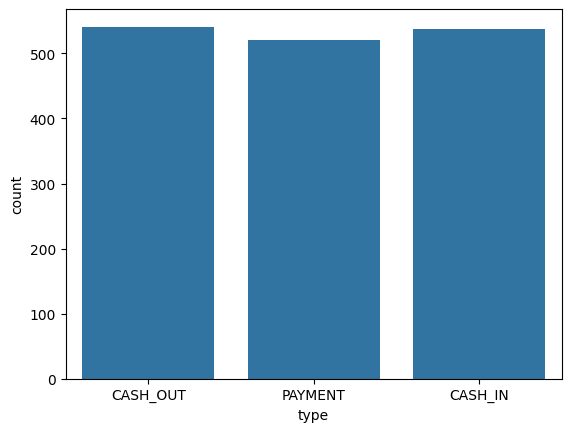

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='type', data=data)
plt.show()

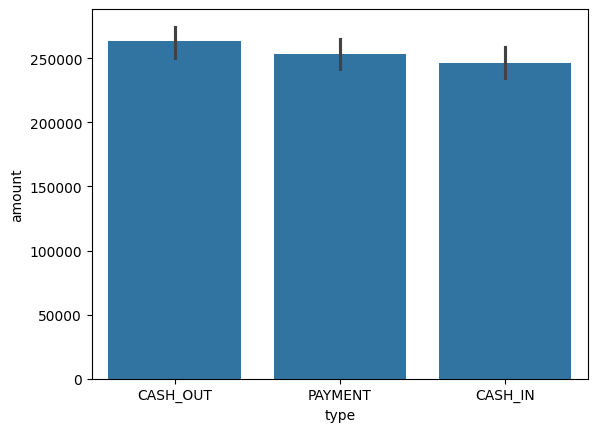

In [11]:
sns.barplot(x='type', y='amount', data=data)
plt.show()

In [13]:
data['isFraud'].value_counts()

isFraud
0    1207
1     393
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Count'>

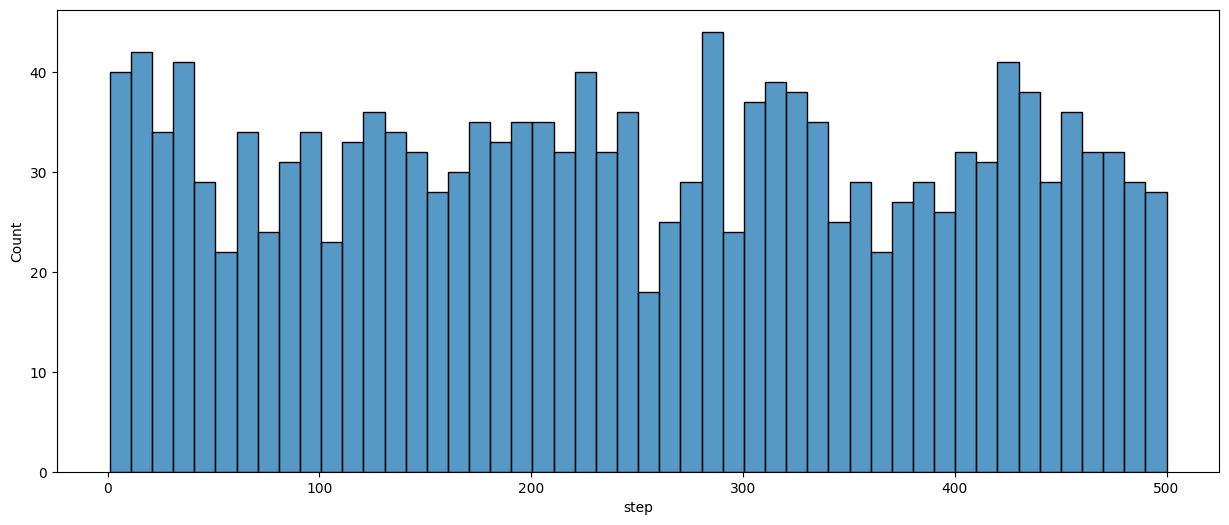

In [15]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50)


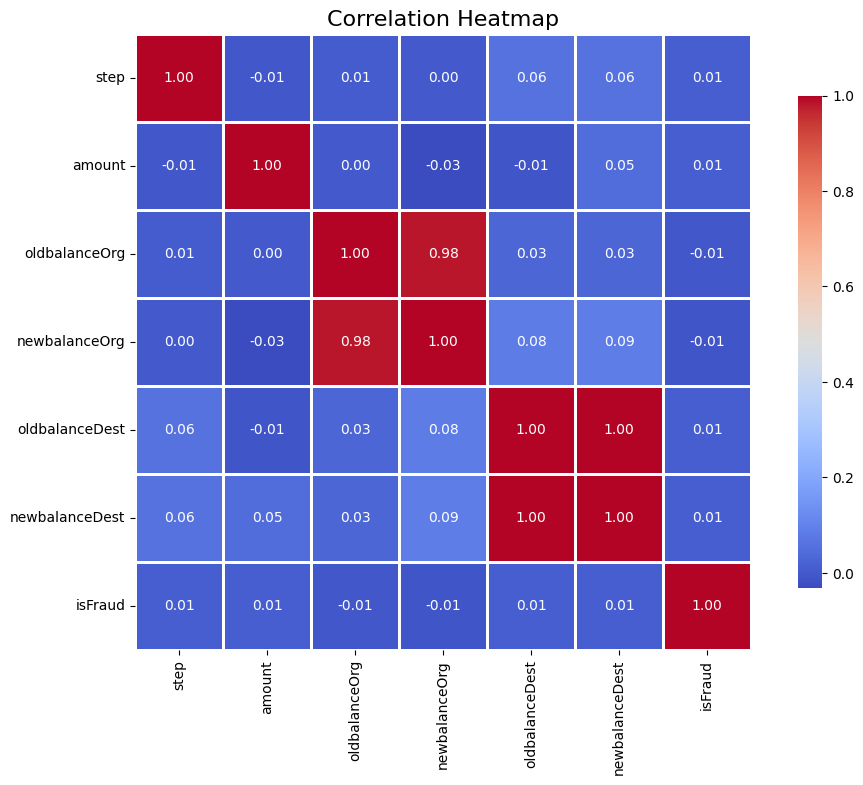

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Create the heatmap for the correlation of numeric columns
plt.figure(figsize=(12, 8))

sns.heatmap(numeric_data.corr(),
            cmap='coolwarm',  # Colormap choice
            annot=True,        # Show correlation values in the cells
            fmt='.2f',         # Format annotations to 2 decimal places
            linewidths=1,      # Line width between cells
            cbar_kws={"shrink": 0.8},  # Shrink the color bar
            square=True,       # Make the heatmap square
            annot_kws={'size': 10},  # Font size for annotations
            xticklabels=numeric_data.columns,  # Ensure column names are labeled correctly
            yticklabels=numeric_data.columns  # Ensure row names are labeled correctly
           )

# Set plot title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


In [19]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,PAYMENT
0,68,CASH_OUT,406229.24,C6140660731,1810730.08,1404500.84,C5635849557,268905.29,675134.53,0,True,False
1,159,PAYMENT,275190.13,C7046563598,591089.00,315898.87,M5746858661,0.00,0.00,0,False,True
2,17,CASH_IN,480273.31,C3203400778,4342340.76,4822614.07,C4017690314,501603.17,981876.48,0,False,False
3,397,CASH_IN,116586.89,C3050380831,3415205.16,3531792.05,C5788899583,3854001.97,3970588.86,0,False,False
4,465,PAYMENT,486216.62,C9397905510,66754.93,0.00,M3142576995,0.00,0.00,0,False,True


In [20]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [21]:
X.shape, y.shape


((1600, 8), (1600,))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = [LogisticRegression(max_iter=1000), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]

# Loop through the models
for model in models:
    model.fit(X_train, y_train)
    print(f'{model} : ')
    
    # Predict probabilities for training set
    train_preds = model.predict_proba(X_train)[:, 1]  # Probability for class 1
    
    # Convert probabilities to class labels using a threshold of 0.5
    train_preds_class = (train_preds > 0.5).astype(int)
    
    # Calculate Training Accuracy
    train_accuracy = accuracy_score(y_train, train_preds_class)
    print('Training Accuracy: ', train_accuracy)
    
    # Predict probabilities for test set
    y_preds = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    
    # Convert probabilities to class labels for the test set
    y_preds_class = (y_preds > 0.5).astype(int)
    
    # Calculate Validation Accuracy
    validation_accuracy = accuracy_score(y_test, y_preds_class)
    print('Validation Accuracy: ', validation_accuracy)
    print()



LogisticRegression(max_iter=1000) : 
Training Accuracy:  0.7553571428571428
Validation Accuracy:  0.7520833333333333

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy:  0.9964285714285714
Validation Accuracy:  0.7

SVC(probability=True) : 
Training Accuracy:  0.75535714

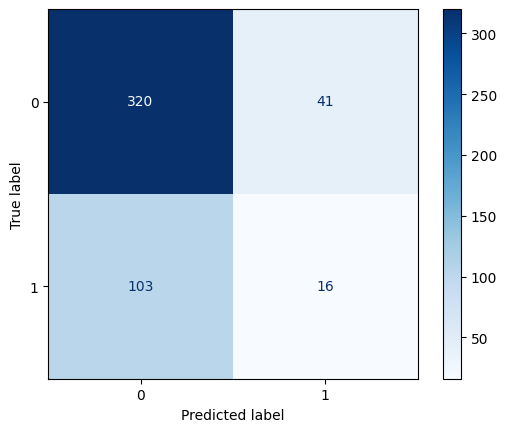

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming models[1] is an XGBClassifier and has been trained already
model = models[1]

# Predict class labels for the test set
y_preds_class = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_preds_class)

# Use ConfusionMatrixDisplay to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')  # 'd' formats the numbers as integers
plt.show()
